# TEAM SIGMOIDS

# Importing the required libraries

In [169]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [170]:
df_train=pd.read_csv('trainData.csv')
df_test=pd.read_csv('testData.csv')


In [171]:
df_train.head()


,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment
0,Milk x 7 ltrs,David Taylor,26-04-2011 11:50,26-Apr-11,26-May-11,672.78,672.78,0.0,13
1,Office Stationery,Stephen Wright MD,24-05-2011 09:40,24-May-11,23-Jun-11,5101.98,5101.98,0.0,38
2,Milk x 10 ltrs,Mark Cordova,24-05-2011 12:56,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0,61
3,Annual Fee,Kimberly White,09-07-2011 10:42,10-May-11,24-May-11,11.98,11.98,0.0,62
4,NaN,Teresa Marshall,05-09-2011 20:55,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0,2


In [172]:
df_test.head()


,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding
0,Annual Fee,Aaron Hoffman,26-11-2015 12:38,30-Nov-15,30-Dec-15,11.98,11.98,0.0
1,NaN,Aaron Murphy,27-10-2016 10:35,06-Sep-16,06-Oct-16,56.98,56.98,0.0
2,NaN,Aaron Parks,29-02-2016 00:53,29-Feb-16,14-Mar-16,61.98,61.98,0.0
3,NaN,Aaron Thomas,27-08-2013 18:46,23-Aug-13,06-Sep-13,674.30,674.30,0.0
4,NaN,Abigail Hernandez,16-05-2017 16:48,10-May-17,09-Jun-17,302.94,302.94,0.0


In [173]:
df_train.shape

(8753, 9)

In [174]:
df_test.shape

(1125, 8)

In [175]:
df_train.isnull().sum()

Description                     7492
Vendor_Name                        0
Created                            0
Invoice_Date                       0
Due_Date                           0
Amount                             0
Settled                            0
Outstanding                        0
Number_of_Days_until_Payment       0
dtype: int64

In [176]:
df_test.isnull().sum()

Description     959
Vendor_Name       0
Created           0
Invoice_Date      0
Due_Date          0
Amount            0
Settled           0
Outstanding       0
dtype: int64

### Creating copies of datasets for processing

In [177]:
df_train_1=df_train.copy()
################################################
df_test_1=df_test.copy()

##Creating a seperate dataframe with name entries to append with our predictions on a later stage
name_test=df_test_1['Vendor_Name']


### Visualising data to find relations

<AxesSubplot:xlabel='Vendor_Name'>

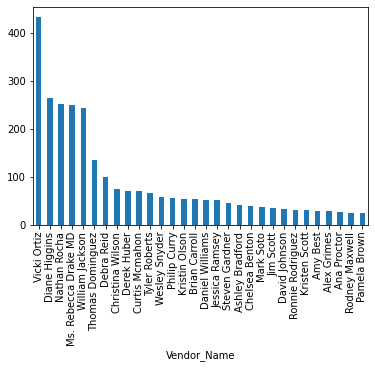

In [178]:
graph1=df_train_1.groupby("Vendor_Name")["Vendor_Name"].count().sort_values(ascending=False).head(30)
graph1.plot.bar()

<AxesSubplot:xlabel='Vendor_Name'>

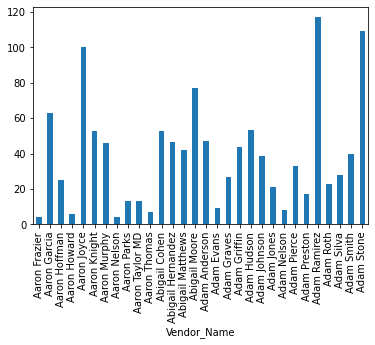

In [179]:
graph2=df_train_1.groupby("Vendor_Name")["Number_of_Days_until_Payment"].mean().head(30)
graph2.plot.bar()

<AxesSubplot:xlabel='Description'>

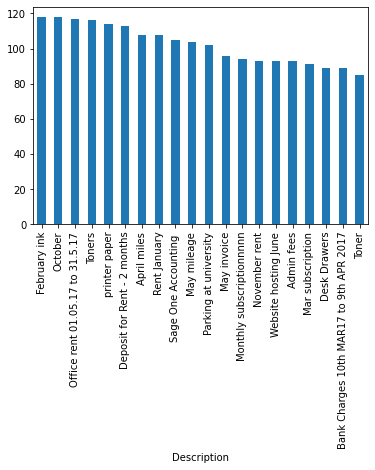

In [180]:
graph3=df_train_1.groupby(["Description"])["Number_of_Days_until_Payment"].mean().sort_values(ascending=False).head(20)
graph3.plot.bar()

<AxesSubplot:xlabel='Description'>

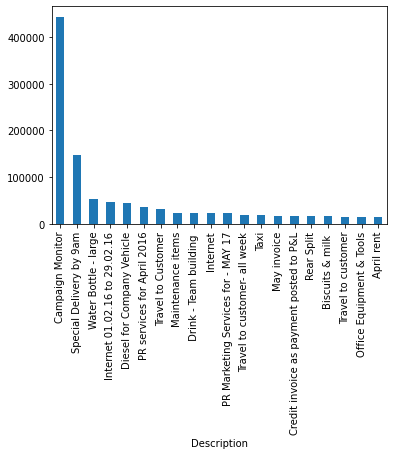

In [181]:
graph4=df_train_1.groupby(["Description"])["Amount"].mean().sort_values(ascending=False).head(20)
graph4.plot.bar()

### For Description and Vendor_Name mapping the dictionaries to dataframe coloumns, finning n.a with zeros

In [182]:
df=pd.concat([df_train_1['Description'], df_test_1['Description']], axis=0)
f=df.unique()

map={k:i for i,k in enumerate(f,1)}
map

#concating the train and test datasets to make 

{'Milk x 7 ltrs': 1,
 'Office Stationery ': 2,
 'Milk x 10 ltrs': 3,
 'Annual Fee': 4,
 nan: 5,
 'Office stationery': 6,
 'Reverse misposting': 7,
 'Reverse mispost': 8,
 'Stationery ': 9,
 'Food for foyer': 10,
 'Return Train tickets to London': 11,
 'Photography in car park ': 12,
 'Parts for maintenance of Company Car': 13,
 'PR Marketing Services': 14,
 'Parts for company vehicle - radio': 15,
 'Cleaning products': 16,
 'Office Table': 17,
 'Desk Drawers': 18,
 'FREIGHT': 19,
 'Food & Drink ': 20,
 'Food & Drink': 21,
 'Breakfast': 22,
 'Travel to customer': 23,
 'Coffee Beans': 24,
 'Drinks': 25,
 'parts for company vehicle - radio amp': 26,
 'Food and Drink ': 27,
 'Fob ': 28,
 'Keys': 29,
 'Food': 30,
 'Food and Drink': 31,
 'Refreshments': 32,
 'Photography of Stock new staff': 33,
 'Storage': 34,
 'Bin liners': 35,
 'Window cleaning': 36,
 'Storage ': 37,
 'Photograph of new staff ': 38,
 'Delivery': 39,
 'Food ': 40,
 'Travel to customer- all week': 41,
 'Metro travel to cust

In [183]:
df2=pd.concat([df_train_1['Vendor_Name'], df_test_1['Vendor_Name']], axis=0)
g=df2.unique()
map1={k:i for i,k in enumerate(g,1)}
map1

{'David Taylor': 1,
 'Stephen Wright MD': 2,
 'Mark Cordova': 3,
 'Kimberly White': 4,
 'Teresa Marshall': 5,
 'Christian Ellis': 6,
 'Courtney Smith': 7,
 'Mario Peters': 8,
 'Kelly Gray': 9,
 'Stephanie Lopez': 10,
 'Jeremy Richardson': 11,
 'Robert Taylor': 12,
 'Kristina Mcgrath': 13,
 'James Roberts': 14,
 'Rachel Campbell': 15,
 'Samantha Campbell': 16,
 'Jeremy Lambert': 17,
 'Jessica Wheeler': 18,
 'Randall Walker': 19,
 'Eric Anderson': 20,
 'Justin Barrera': 21,
 'Jennifer Peters': 22,
 'Richard Moore': 23,
 'Melissa Huang': 24,
 'Douglas Schwartz': 25,
 'Debra Wright': 26,
 'George Walker': 27,
 'Robert Holmes': 28,
 'Christine Mason': 29,
 'Ashley George': 30,
 'Hailey Reid': 31,
 'Hector Lang': 32,
 'Hannah Taylor': 33,
 'Jerry Christensen': 34,
 'Brittany Bowers': 35,
 'Martha Daniels': 36,
 'Scott Miranda': 37,
 'Scott Johnson': 38,
 'Michael Sanchez': 39,
 'Chad Lee': 40,
 'Judy Nguyen': 41,
 'Nicole Graves': 42,
 'Brittany Duffy': 43,
 'Brendan Wells': 44,
 'Daniel Moo

In [184]:
df_train_1['Description']= df_train_1['Description'].map(map)
df_test_1['Description']= df_test_1['Description'].map(map)
###################################################################
df_train_1['Vendor_Name']= df_train_1['Vendor_Name'].map(map1)
df_test_1['Vendor_Name']= df_test_1['Vendor_Name'].map(map1)

df_train_1['Description'].fillna(0)
df_test_1['Description'].fillna(0)

0       4
1       5
2       5
3       5
4       5
       ..
1120    5
1121    5
1122    5
1123    5
1124    5
Name: Description, Length: 1125, dtype: int64

In [185]:
df_train_1

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment
0,1,1,26-04-2011 11:50,26-Apr-11,26-May-11,672.78,672.78,0.0,13
1,2,2,24-05-2011 09:40,24-May-11,23-Jun-11,5101.98,5101.98,0.0,38
2,3,3,24-05-2011 12:56,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0,61
3,4,4,09-07-2011 10:42,10-May-11,24-May-11,11.98,11.98,0.0,62
4,5,5,05-09-2011 20:55,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0,2
...,...,...,...,...,...,...,...,...,...
8748,5,3272,31-10-2017 14:40,29-Sep-17,29-Oct-17,551.98,551.98,0.0,34
8749,5,3273,31-10-2017 14:44,29-Sep-17,29-Oct-17,386.98,386.98,0.0,34
8750,5,3274,31-10-2017 22:07,31-Oct-17,01-Nov-17,279.81,279.81,0.0,5
8751,5,3275,02-11-2017 10:51,23-Oct-17,06-Nov-17,145.98,145.98,0.0,10


In [186]:
df_test_1

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding
0,4,1966,26-11-2015 12:38,30-Nov-15,30-Dec-15,11.98,11.98,0.0
1,5,1581,27-10-2016 10:35,06-Sep-16,06-Oct-16,56.98,56.98,0.0
2,5,1890,29-02-2016 00:53,29-Feb-16,14-Mar-16,61.98,61.98,0.0
3,5,151,27-08-2013 18:46,23-Aug-13,06-Sep-13,674.30,674.30,0.0
4,5,2761,16-05-2017 16:48,10-May-17,09-Jun-17,302.94,302.94,0.0
...,...,...,...,...,...,...,...,...
1120,5,2825,31-08-2016 13:09,29-Aug-16,12-Sep-16,4201.98,4201.98,0.0
1121,5,815,28-07-2014 10:43,28-Jul-14,04-Aug-14,93.18,93.18,0.0
1122,5,575,05-09-2017 10:14,02-Sep-17,06-Sep-17,1255.98,1255.98,0.0
1123,5,1737,02-01-2015 13:53,02-Jan-15,01-Feb-15,678.78,58.38,620.4


### Seperating the Number_of_Days_until_Payment columns as Y_train

In [187]:
Y_train=df_train_1.Number_of_Days_until_Payment

X_train=df_train_1.drop(['Number_of_Days_until_Payment'], axis=1)

Y_train

0       13
1       38
2       61
3       62
4        2
        ..
8748    34
8749    34
8750     5
8751    10
8752     1
Name: Number_of_Days_until_Payment, Length: 8753, dtype: int64

In [188]:
df_test_1.head()

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding
0,4,1966,26-11-2015 12:38,30-Nov-15,30-Dec-15,11.98,11.98,0.0
1,5,1581,27-10-2016 10:35,06-Sep-16,06-Oct-16,56.98,56.98,0.0
2,5,1890,29-02-2016 00:53,29-Feb-16,14-Mar-16,61.98,61.98,0.0
3,5,151,27-08-2013 18:46,23-Aug-13,06-Sep-13,674.30,674.30,0.0
4,5,2761,16-05-2017 16:48,10-May-17,09-Jun-17,302.94,302.94,0.0


In [189]:
X_train.head()

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding
0,1,1,26-04-2011 11:50,26-Apr-11,26-May-11,672.78,672.78,0.0
1,2,2,24-05-2011 09:40,24-May-11,23-Jun-11,5101.98,5101.98,0.0
2,3,3,24-05-2011 12:56,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0
3,4,4,09-07-2011 10:42,10-May-11,24-May-11,11.98,11.98,0.0
4,5,5,05-09-2011 20:55,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0


In [190]:
X_test=df_test_1
X_train.dtypes

Description       int64
Vendor_Name       int64
Created          object
Invoice_Date     object
Due_Date         object
Amount          float64
Settled         float64
Outstanding     float64
dtype: object

### Converting the datatypes from object to pandas date-time

In [191]:
X_train['Invoice_Date'] = pd.to_datetime(X_train['Invoice_Date'])
X_train['Due_Date'] = pd.to_datetime(X_train['Due_Date'])
X_train['Created'] = pd.to_datetime(X_train['Created'])
######################################################################
X_test['Invoice_Date'] = pd.to_datetime(X_test['Invoice_Date'])
X_test['Due_Date'] = pd.to_datetime(X_test['Due_Date'])
X_test['Created'] = pd.to_datetime(X_test['Created'])

### Seperating the year, month , dates, day of the week from dates to create new data coloumns.

In [192]:
X_train['Year_invoice'] = X_train['Invoice_Date'].dt.year
X_train['Month_invoice'] = X_train['Invoice_Date'].dt.month
X_train['Week_Day_invoice'] = X_train['Invoice_Date'].dt.day_of_week
X_train['Day_invoice'] = X_train['Invoice_Date'].dt.day
##############################################################################
X_train['Year_Due'] = X_train['Due_Date'].dt.year
X_train['Month_Due'] = X_train['Due_Date'].dt.month
X_train['Week_Day_Due'] = X_train['Due_Date'].dt.day_of_week
X_train['Day_Due'] = X_train['Due_Date'].dt.day
##############################################################################
X_train['Year_Created'] = X_train['Created'].dt.year
X_train['Month_Created'] = X_train['Created'].dt.month
X_train['Week_Day_Created'] = X_train['Created'].dt.day_of_week
X_train['Day_Created'] = X_train['Created'].dt.day
X_train['Hours_Created'] = X_train['Created'].dt.hour
##############################################################################
X_train['Diff_invoice-due'] = (X_train['Due_Date']-X_train['Invoice_Date']).dt.days
X_train['Diff_invoice-Created'] = (X_train['Created']-X_train['Invoice_Date']).dt.days
# X_train['Diff_due-created'] = (X_train['Due_Date']-X_train['Created']).dt.days
####################################################################################################
####################################################################################################
X_test['Year_invoice'] = X_test['Invoice_Date'].dt.year
X_test['Month_invoice'] = X_test['Invoice_Date'].dt.month
X_test['Week_Day_invoice'] = X_test['Invoice_Date'].dt.day_of_week
X_test['Day_invoice'] = X_test['Invoice_Date'].dt.day
##############################################################################
X_test['Year_Due'] = X_test['Due_Date'].dt.year
X_test['Month_Due'] = X_test['Due_Date'].dt.month
X_test['Week_Day_Due'] = X_test['Due_Date'].dt.day_of_week
X_test['Day_Due'] = X_test['Due_Date'].dt.day
##############################################################################
X_test['Year_Created'] = X_test['Created'].dt.year
X_test['Month_Created'] = X_test['Created'].dt.month
X_test['Week_Day_Created'] = X_test['Created'].dt.day_of_week
X_test['Day_Created'] = X_test['Created'].dt.day
X_test['Hours_Created'] = X_test['Created'].dt.hour
##############################################################################
X_test['Diff_invoice-due'] = (X_test['Due_Date']-X_test['Invoice_Date']).dt.days
X_test['Diff_invoice-Created'] = (X_test['Created']-X_test['Invoice_Date']).dt.days
# X_test['Diff_due-created'] = (X_test['Due_Date']-X_test['Created']).dt.days
# X_test['Diff_due-created'] = (X_test['Created']-X_test['Created']).dt.days


In [193]:
X_train=X_train.drop(['Invoice_Date', 'Due_Date', 'Created'], axis=1)
X_test=X_test.drop(['Invoice_Date', 'Due_Date', 'Created'], axis=1)
## Dropping the columns that are not required

In [194]:
X_train

,Description,Vendor_Name,Amount,Settled,Outstanding,Year_invoice,Month_invoice,Week_Day_invoice,Day_invoice,Year_Due,Month_Due,Week_Day_Due,Day_Due,Year_Created,Month_Created,Week_Day_Created,Day_Created,Hours_Created,Diff_invoice-due,Diff_invoice-Created
0,1,1,672.78,672.78,0.0,2011,4,1,26,2011,5,3,26,2011,4,1,26,11,30,0
1,2,2,5101.98,5101.98,0.0,2011,5,1,24,2011,6,3,23,2011,5,1,24,9,30,0
2,3,3,7422.78,7422.78,0.0,2011,3,3,24,2011,4,5,23,2011,5,1,24,12,30,61
3,4,4,11.98,11.98,0.0,2011,5,1,10,2011,5,1,24,2011,9,2,7,10,14,120
4,5,5,5501.98,5501.98,0.0,2011,9,0,5,2011,9,1,6,2011,5,0,9,20,1,-119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,5,3272,551.98,551.98,0.0,2017,9,4,29,2017,10,6,29,2017,10,1,31,14,30,32
8749,5,3273,386.98,386.98,0.0,2017,9,4,29,2017,10,6,29,2017,10,1,31,14,30,32
8750,5,3274,279.81,279.81,0.0,2017,10,1,31,2017,11,2,1,2017,10,1,31,22,1,0
8751,5,3275,145.98,145.98,0.0,2017,10,0,23,2017,11,0,6,2017,2,5,11,10,14,-254


### Encoding the year coloumns from a dictionary

In [195]:
l=X_train['Year_invoice'].unique()

dict_map = {l[i]: i+1 for i in range(0, len(l), 1)}
dict_map

{2011: 1, 2012: 2, 2013: 3, 2014: 4, 2015: 5, 2016: 6, 2017: 7}

In [196]:
X_train['Year_Due']= X_train['Year_Due'].map(dict_map)
X_train['Year_Created']= X_train['Year_Created'].map(dict_map)
X_train['Year_invoice']= X_train['Year_invoice'].map(dict_map)
X_train

,Description,Vendor_Name,Amount,Settled,Outstanding,Year_invoice,Month_invoice,Week_Day_invoice,Day_invoice,Year_Due,Month_Due,Week_Day_Due,Day_Due,Year_Created,Month_Created,Week_Day_Created,Day_Created,Hours_Created,Diff_invoice-due,Diff_invoice-Created
0,1,1,672.78,672.78,0.0,1,4,1,26,1,5,3,26,1,4,1,26,11,30,0
1,2,2,5101.98,5101.98,0.0,1,5,1,24,1,6,3,23,1,5,1,24,9,30,0
2,3,3,7422.78,7422.78,0.0,1,3,3,24,1,4,5,23,1,5,1,24,12,30,61
3,4,4,11.98,11.98,0.0,1,5,1,10,1,5,1,24,1,9,2,7,10,14,120
4,5,5,5501.98,5501.98,0.0,1,9,0,5,1,9,1,6,1,5,0,9,20,1,-119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,5,3272,551.98,551.98,0.0,7,9,4,29,7,10,6,29,7,10,1,31,14,30,32
8749,5,3273,386.98,386.98,0.0,7,9,4,29,7,10,6,29,7,10,1,31,14,30,32
8750,5,3274,279.81,279.81,0.0,7,10,1,31,7,11,2,1,7,10,1,31,22,1,0
8751,5,3275,145.98,145.98,0.0,7,10,0,23,7,11,0,6,7,2,5,11,10,14,-254


In [197]:
X_test['Year_Due']= X_test['Year_Due'].map(dict_map)
X_test['Year_Created']= X_test['Year_Created'].map(dict_map)
X_test['Year_invoice']= X_test['Year_invoice'].map(dict_map)
X_test

,Description,Vendor_Name,Amount,Settled,Outstanding,Year_invoice,Month_invoice,Week_Day_invoice,Day_invoice,Year_Due,Month_Due,Week_Day_Due,Day_Due,Year_Created,Month_Created,Week_Day_Created,Day_Created,Hours_Created,Diff_invoice-due,Diff_invoice-Created
0,4,1966,11.98,11.98,0.0,5,11,0,30,5,12,2,30,5,11,3,26,12,30,-4
1,5,1581,56.98,56.98,0.0,6,9,1,6,6,10,3,6,6,10,3,27,10,30,51
2,5,1890,61.98,61.98,0.0,6,2,0,29,6,3,0,14,6,2,0,29,0,14,0
3,5,151,674.30,674.30,0.0,3,8,4,23,3,9,4,6,3,8,1,27,18,14,4
4,5,2761,302.94,302.94,0.0,7,5,2,10,7,6,4,9,7,5,1,16,16,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,5,2825,4201.98,4201.98,0.0,6,8,0,29,6,9,0,12,6,8,2,31,13,14,2
1121,5,815,93.18,93.18,0.0,4,7,0,28,4,8,0,4,4,7,0,28,10,7,0
1122,5,575,1255.98,1255.98,0.0,7,9,5,2,7,9,2,6,7,5,1,9,10,4,-116
1123,5,1737,678.78,58.38,620.4,5,1,4,2,5,2,6,1,5,2,6,1,13,30,30


In [198]:
X_test.dtypes

Description               int64
Vendor_Name               int64
Amount                  float64
Settled                 float64
Outstanding             float64
Year_invoice              int64
Month_invoice             int64
Week_Day_invoice          int64
Day_invoice               int64
Year_Due                  int64
Month_Due                 int64
Week_Day_Due              int64
Day_Due                   int64
Year_Created              int64
Month_Created             int64
Week_Day_Created          int64
Day_Created               int64
Hours_Created             int64
Diff_invoice-due          int64
Diff_invoice-Created      int64
dtype: object

### Plotted a Heat Map for Better understanding

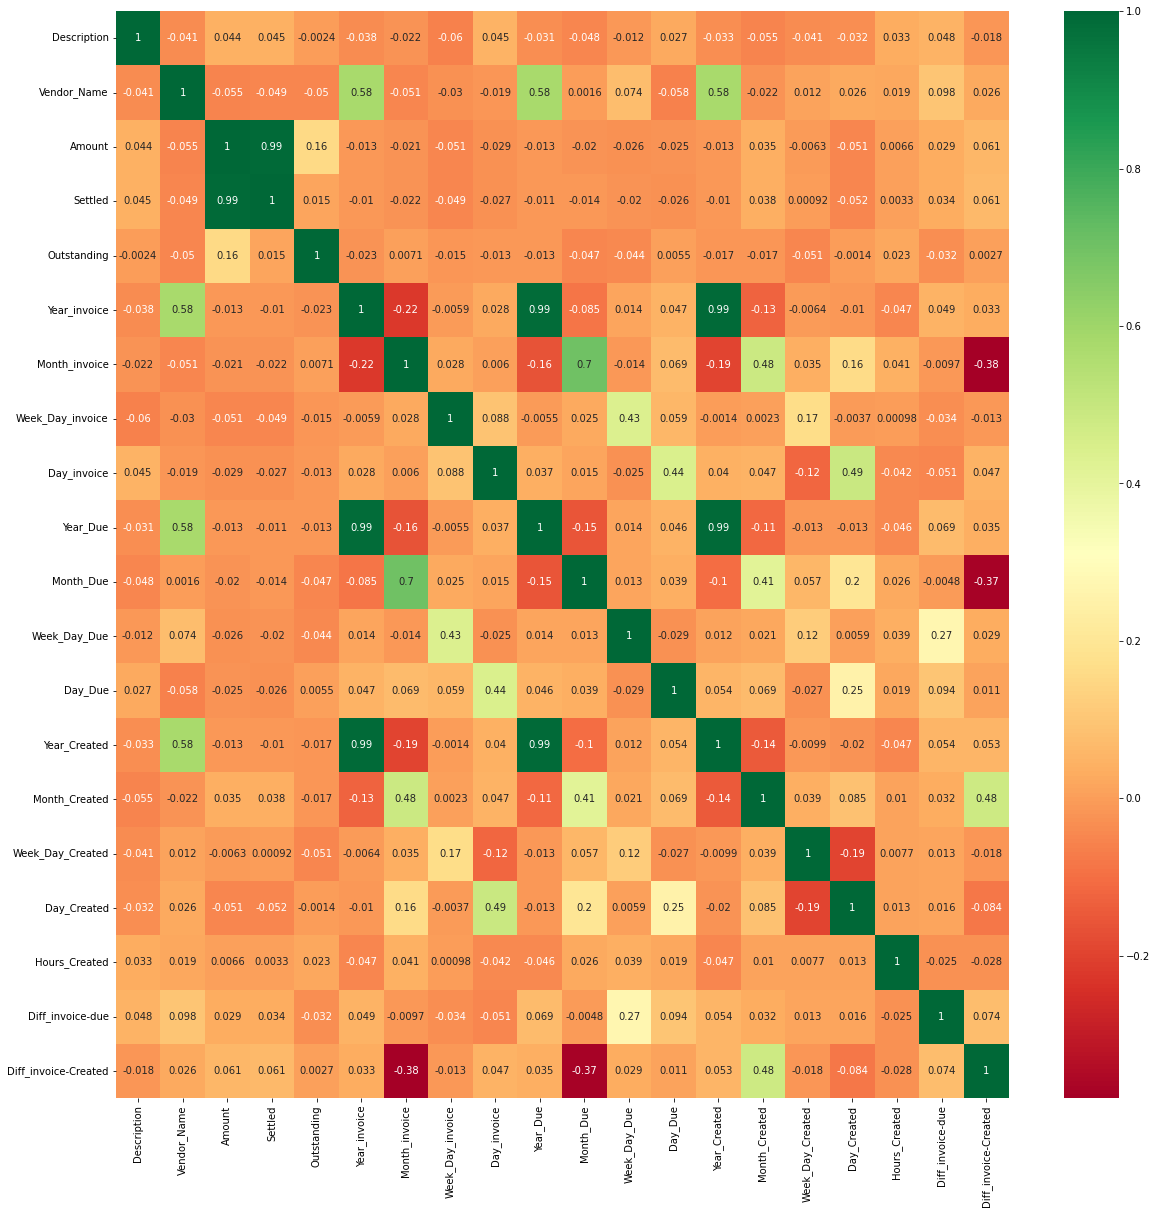

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df_test_1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_test_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Finally checking the training and testing datasets.

In [200]:
# for column in X_train.columns:
#     X_train['Description'] = (X_train['Description'] - X_train['Description'].min()) / (X_train['Description'].max() - X_train['Description'].min()) 

# for column in X_train.columns:
#     X_train['Vendor_Name'] = (X_train['Vendor_Name'] - X_train['Vendor_Name'].min()) / (X_train['Vendor_Name'].max() - X_train['Vendor_Name'].min()) 


# for column in X_test.columns: 
#     X_test['Description'] = (X_test['Description'] - X_test['Description'].min()) / (X_test['Description'].max() - X_test['Description'].min())    

# for column in X_test.columns:
#     X_test['Vendor_Name'] = (X_test['Vendor_Name'] - X_test['Vendor_Name'].min()) / (X_test['Vendor_Name'].max() - X_test['Vendor_Name'].min())   

In [201]:
X_train

,Description,Vendor_Name,Amount,Settled,Outstanding,Year_invoice,Month_invoice,Week_Day_invoice,Day_invoice,Year_Due,Month_Due,Week_Day_Due,Day_Due,Year_Created,Month_Created,Week_Day_Created,Day_Created,Hours_Created,Diff_invoice-due,Diff_invoice-Created
0,1,1,672.78,672.78,0.0,1,4,1,26,1,5,3,26,1,4,1,26,11,30,0
1,2,2,5101.98,5101.98,0.0,1,5,1,24,1,6,3,23,1,5,1,24,9,30,0
2,3,3,7422.78,7422.78,0.0,1,3,3,24,1,4,5,23,1,5,1,24,12,30,61
3,4,4,11.98,11.98,0.0,1,5,1,10,1,5,1,24,1,9,2,7,10,14,120
4,5,5,5501.98,5501.98,0.0,1,9,0,5,1,9,1,6,1,5,0,9,20,1,-119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,5,3272,551.98,551.98,0.0,7,9,4,29,7,10,6,29,7,10,1,31,14,30,32
8749,5,3273,386.98,386.98,0.0,7,9,4,29,7,10,6,29,7,10,1,31,14,30,32
8750,5,3274,279.81,279.81,0.0,7,10,1,31,7,11,2,1,7,10,1,31,22,1,0
8751,5,3275,145.98,145.98,0.0,7,10,0,23,7,11,0,6,7,2,5,11,10,14,-254


In [202]:
X_test

,Description,Vendor_Name,Amount,Settled,Outstanding,Year_invoice,Month_invoice,Week_Day_invoice,Day_invoice,Year_Due,Month_Due,Week_Day_Due,Day_Due,Year_Created,Month_Created,Week_Day_Created,Day_Created,Hours_Created,Diff_invoice-due,Diff_invoice-Created
0,4,1966,11.98,11.98,0.0,5,11,0,30,5,12,2,30,5,11,3,26,12,30,-4
1,5,1581,56.98,56.98,0.0,6,9,1,6,6,10,3,6,6,10,3,27,10,30,51
2,5,1890,61.98,61.98,0.0,6,2,0,29,6,3,0,14,6,2,0,29,0,14,0
3,5,151,674.30,674.30,0.0,3,8,4,23,3,9,4,6,3,8,1,27,18,14,4
4,5,2761,302.94,302.94,0.0,7,5,2,10,7,6,4,9,7,5,1,16,16,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,5,2825,4201.98,4201.98,0.0,6,8,0,29,6,9,0,12,6,8,2,31,13,14,2
1121,5,815,93.18,93.18,0.0,4,7,0,28,4,8,0,4,4,7,0,28,10,7,0
1122,5,575,1255.98,1255.98,0.0,7,9,5,2,7,9,2,6,7,5,1,9,10,4,-116
1123,5,1737,678.78,58.38,620.4,5,1,4,2,5,2,6,1,5,2,6,1,13,30,30


In [203]:
SEED=1

### Preparing models for predictions

In [204]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train,Y_train,test_size=0.3,random_state=SEED)

In [205]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train1,Y_train1)
lr_clf.score(X_test1,Y_test1)

0.0859330274161042

In [206]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(X_train1, Y_train1)
# rf.score(X_test1, Y_test1)
# pred1 = rf.predict(X_test1)
# rmse = mean_squared_error(Y_test1, pred1,squared=False)
# print(rmse)

In [230]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

GBR = GradientBoostingRegressor(n_estimators=1000, random_state=SEED)
GBR.fit(X_train1, Y_train1)
GBR.score(X_test1, Y_test1)
pred = GBR.predict(X_test1)

rmse = mean_squared_error(Y_test1, pred,squared=False)
print(rmse)

## We will be using GBR as it gives lowest score

23.66249678464502


### Cross validation

In [216]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

cross_val_score(GradientBoostingRegressor(), X_train1, Y_train1, cv=cv)

array([0.25823741, 0.2652264 , 0.28870637, 0.26070052, 0.27229829,
       0.245789  , 0.28101092, 0.27357254, 0.28502065, 0.29907954])

### Preparing predictions for test datasets.

In [231]:
ans=GBR.predict(X_test)
dict = {'Number_of_Days_until_Payment': ans}
df_ans = pd.DataFrame(dict)
df_ans

,Number_of_Days_until_Payment
0,18.058214
1,56.605202
2,63.158246
3,50.398985
4,34.482964
...,...
1120,34.996154
1121,14.502574
1122,24.692580
1123,50.097697


In [232]:
final = pd.concat([name_test, df_ans.reindex(name_test.index)], axis=1)

In [233]:
final

,Vendor_Name,Number_of_Days_until_Payment
0,Aaron Hoffman,18.058214
1,Aaron Murphy,56.605202
2,Aaron Parks,63.158246
3,Aaron Thomas,50.398985
4,Abigail Hernandez,34.482964
...,...,...
1120,Zachary Coleman,34.996154
1121,Zachary Dudley,14.502574
1122,Zachary Hernandez,24.692580
1123,Zachary Simmons,50.097697


In [234]:
final.to_csv('finalaj43.csv',index= False)
### Saving predictions

In [152]:
# import optuna
# import sklearn
# def objective(trial):
#       n_estimators = trial.suggest_int('n_estimators', 100, 1000)
#       learning_rate = int(trial.suggest_loguniform('learning_rate', 0.1, 0.9))
# #       max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
#       clf = sklearn.ensemble.GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
#       clf.fit(X_train1, Y_train1)
#       prred=clf.predict(X_train)
#       rmse = mean_squared_error(Y_test1, prred,squared=False)
#       return rmse

In [153]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=50)